# Setup

## Options

In [1]:
import crispr as cr 
import pertpy
import muon
import os
import pandas as pd
import numpy as np
from config import (files_data, col_cell_type_data, col_gene_symbols_data, 
                    assays_data, layer_perturbation_data,
                    col_perturbation_data, key_control_data, 
                    col_split_by_data, layer_perturbation_data,
                    label_perturbation_type_data, col_target_genes_data,
                    key_treatment_data, col_guide_rna_data,
                    col_sample_id_data, load_example_data)

# Options
print(dir(cr.ax))
n_threads = 4
# file = "CRISPRi_scr"
file = "CRISPRi_ess"
# file = "ECCITE"
# file = "augur_ex"
# file = "screen"
# file = "coda"
# file = "perturb-seq"
# regress_out = ['total_counts', 'pct_counts_mt']
regress_out = None
process_kws = dict(hvg_kws = dict(min_mean=0.0125, max_mean=3, min_disp=0.5),
                   target_sum = 1e4, max_genes_by_counts = 2500, 
                   max_pct_mt = 5, min_genes = 200, min_cells = 3, scale = 10,
                   regress_out = regress_out)
write_public = True  # if need to download public data, write to examples/data?

#  Set Arguments
col_cell_type = col_cell_type_data[file]
col_sample_id = col_sample_id_data[file]
col_perturbation = col_perturbation_data[file]
col_target_genes = col_target_genes_data[file]
key_control, label_perturbation_type, layer = [
    x[file] for x in [key_control_data, label_perturbation_type_data,
                      layer_perturbation_data]
]
col_gene_symbols = col_gene_symbols_data[file]
if file in assays_data:
    if isinstance(assays_data[file], str) or assays_data[file] is None:
        assays_data[file] = [assays_data[file], None]
    assay, assay_protein = assays_data[file]
else:
    assay, assay_protein = None
key_treatment = key_treatment_data[file]
col_split_by = col_split_by_data[file]
col_guide_rna = col_guide_rna_data[file]
layer_perturbation = layer_perturbation_data[file]
file_path = files_data[file]
print(files_data)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analyze_composition', 'cluster', 'clustering', 'perform_augur', 'perform_differential_prioritization', 'perform_mixscape', 'perturbations']
{'CRISPRi_scr': '/home/asline01/projects/crispr/examples/data/crispr-screening/filtered_feature_bc_matrix_HH06.h5', 'CRISPRi_wgs': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_gwps.h5ad', 'CRISPRi_ess': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad', 'pool': '/home/asline01/projects/crispr/examples/data/norman_2019_raw.h5ad', 'bulk': '/home/asline01/projects/crispr/examples/data/burczynski_crohn.h5ad', 'screen': '/home/asline01/projects/crispr/examples/data/dixit_2016_raw.h5ad', 'perturb-seq': '/home/asline01/projects/crispr/examples/data/adamson_2016_upr_perturb_seq.h5ad', 'ECCITE': '/home/asline01/projects/crispr/examples/data/papalexi_2021.h5ad', 'coda': '/home/asline01/projects/

## Data

### Load

In [2]:
adata = load_example_data(file, col_gene_symbols, 
                          write_public=write_public)  # (down)load h5ad file
print(adata)
adata.obs.head()
print(adata.layers)
if col_perturbation is not None:
    print(f"\n\n{'=' * 80}\n\nPerturbations:\n")
    print(adata[assay].obs[
        col_perturbation].unique() if assay else adata.obs[
            col_perturbation].unique())
adata[assay].obs.head() if assay else adata.obs.head()

File Path: /home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad


/home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad exists.

<<< LOADING FILE /home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad with sc.read()>>>
AnnData object with n_obs × n_vars = 111445 × 33694
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_F

,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells,guide_AHR,guide_ARID1A,guide_ARRDC3,...,guide_TSC22D1,guide_UBASH3A,guide_UBASH3B,guide_ZBTB1,guide_ZBTB10,guide_ZBTB25,guide_ZC3HAV1,guide_ZNF318,guide_ids,Condition
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAGAAGC-1,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,1252,67,18.686567,1,True,2,0,0,0,...,0,0,0,0,0,0,0,0,NT,NT
AAACCTGAGGCATGTG-1,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,2151,104,20.682692,1,True,1,0,0,0,...,1,0,0,0,0,0,0,0,TSC22D1,Perturbed
AAACCTGAGGCCCTTG-1,KLF1_MAP2K6__KLF1_MAP2K6,1037,59,17.576271,1,True,1,0,0,0,...,0,0,0,0,0,0,0,0,"KLF1,MAP2K6",Perturbed
AAACCTGCACGAAGCA-1,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,958,39,24.564103,1,True,1,0,0,0,...,0,0,0,0,0,0,0,0,NT,NT
AAACCTGCAGACGTAG-1,CEBPE_RUNX1T1__CEBPE_RUNX1T1,244,14,17.428571,1,True,1,0,0,0,...,0,0,0,0,0,0,0,0,"CEBPE,RUNX1T1",Perturbed


### Process

In [3]:
print(process_kws)
adata = cr.pp.process_data(adata, assay=assay, assay_protein=assay_protein,
                           **process_kws)  # process

{'hvg_kws': {'min_mean': 0.0125, 'max_mean': 3, 'min_disp': 0.5}, 'target_sum': 10000.0, 'max_genes_by_counts': 2500, 'max_pct_mt': 5, 'min_genes': 200, 'min_cells': 3, 'scale': 10, 'regress_out': None}

<<< NORMALIZING >>>

<<< FILTERING >>>

<<< DETECTING VARIABLE GENES >>>

<<< SCALING >>>





### Assign Guide RNAs

In [9]:
if "mod" in dir(adata) and "gdo" in adata.mod:  # Guide RNA assignment
    print(adata["gdo"])
    figs_guide_rna = cr.pp.assign_guide_rna(adata, plot=True, 
                                            show_gene_labels=True)
    print(adata["gdo"])  # creates layer "assigned_guides"

## Inspect

In [5]:
print(adata)
print(adata.obs)
adata[assay].obs if assay else adata.obs

AnnData object with n_obs × n_vars = 17306 × 1032
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF2C', 'gu

,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells,guide_AHR,guide_ARID1A,guide_ARRDC3,...,guide_ZBTB25,guide_ZC3HAV1,guide_ZNF318,guide_ids,Condition,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGCACGAAGCA-1,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,958,39,24.564103,1,True,1,0,0,0,...,0,0,0,NT,NT,2114,2114,2627.192383,0.0,0.0
AAACCTGGTATCGCAT-1,CBL_PTPN9__CBL_PTPN9,1048,57,18.385965,1,True,1,0,0,0,...,0,0,0,"CBL,PTPN9",Perturbed,1927,1927,2471.713379,0.0,0.0
AAACCTGGTCCGAAGA-1,SGK1_TBX3__SGK1_TBX3,436,20,21.800000,1,True,1,0,0,0,...,0,0,0,"SGK1,TBX3",Perturbed,1801,1801,2494.415283,0.0,0.0
AAACCTGTCAGGCGAA-1,NegCtrl0_FOXA1__NegCtrl0_FOXA1,269,12,22.416667,1,True,1,0,0,0,...,0,0,0,FOXA1,Perturbed,2124,2124,2645.386475,0.0,0.0
AAACCTGTCCGTAGTA-1,BCORL1_NegCtrl0__BCORL1_NegCtrl0,1128,63,17.904762,1,True,1,0,0,0,...,0,0,0,BCORL1,Perturbed,2135,2135,2499.085449,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACGAAACG-8,UBASH3B_PTPN9__UBASH3B_PTPN9,328,24,13.666667,8,True,2,0,0,0,...,0,0,0,"PTPN9,UBASH3B",Perturbed,2260,2260,2793.444580,0.0,0.0
TTTGTCACACGAGGTA-8,TGFBR2_NegCtrl0__TGFBR2_NegCtrl0,397,21,18.904762,8,True,1,0,0,0,...,0,0,0,TGFBR2,Perturbed,1808,1808,2578.521973,0.0,0.0
TTTGTCAGTACCTACA-8,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,480,26,18.461538,8,True,1,0,0,0,...,0,0,0,TSC22D1,Perturbed,2498,2498,2781.189941,0.0,0.0


# Analysis

## UMAP

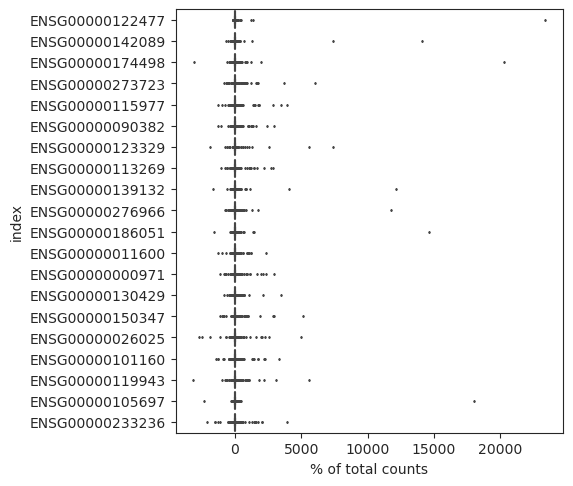



<<< PERFORMING PCA >>>


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING WITH UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


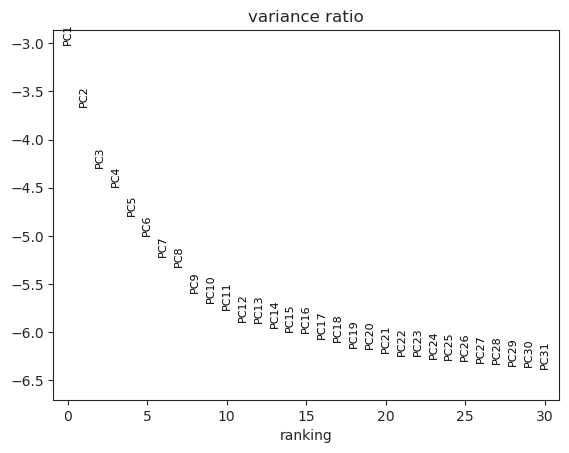

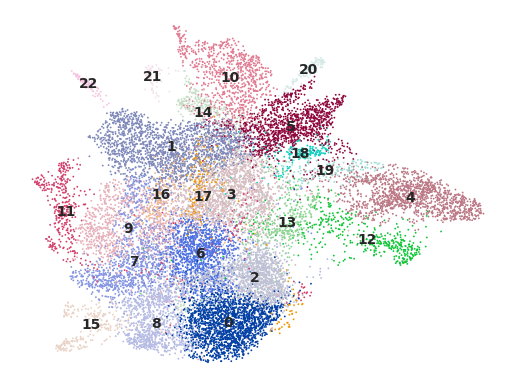

In [6]:
figs_cluster = cr.ax.clustering.cluster(adata, assay=assay, plot=True,
                                        method_cluster="leiden")

## Mixscape

In [7]:
    # import pertpy as pt
    # mix = pt.tl.Mixscape()
    # mix.perturbation_signature(
    #     adata[assay] if assay else adata, col_perturbation, 
    #     key_control, split_by=col_split_by)  # perturbation signature
    # mix.mixscape(adata=adata[assay] if assay else adata, 
    #         labels=col_target_genes, control=key_control, 
    #         layer=layer_perturbation, 
    #         perturbation_type=label_perturbation_type,
    #         min_de_genes=5)  # Mixscape classification

In [14]:
if assay:
    print("Perturbations:\n" + ", ".join(
        adata[assay].obs[col_perturbation].astype(str).unique()))
else:
    print("Perturbations:\n" + ", ".join(
        adata.obs[col_perturbation].astype(str).unique()))
figs_mix = cr.ax.perform_mixscape(
    adata, col_perturbation, assay=assay, key_control=key_control,
    label_perturbation_type=label_perturbation_type, 
    layer_perturbation=layer_perturbation,
    target_gene_idents=True,  # to plot all
    col_target_genes=col_target_genes, 
    min_de_genes=5, col_split_by=col_split_by, plot=True)

Perturbations:
NT, Perturbed


ValueError: Input X contains NaN.
GaussianMixture does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Augur

In [ ]:
data, results, figs_aug = cr.ax.perform_augur(adata, assay=assay,
                                              classifier="random_forest_classifier", 
                                              select_variance_features=True,
                                              augur_mode="velocity", subsample_size=20,
                                              col_cell_type=col_cell_type,
                                              col_perturbation=col_perturbation,
                                              key_control=key_control,
                                              key_treatment=key_treatment,
                                              seed=1618, n_threads=n_threads, plot=True)

## Distance Metrics

Output()

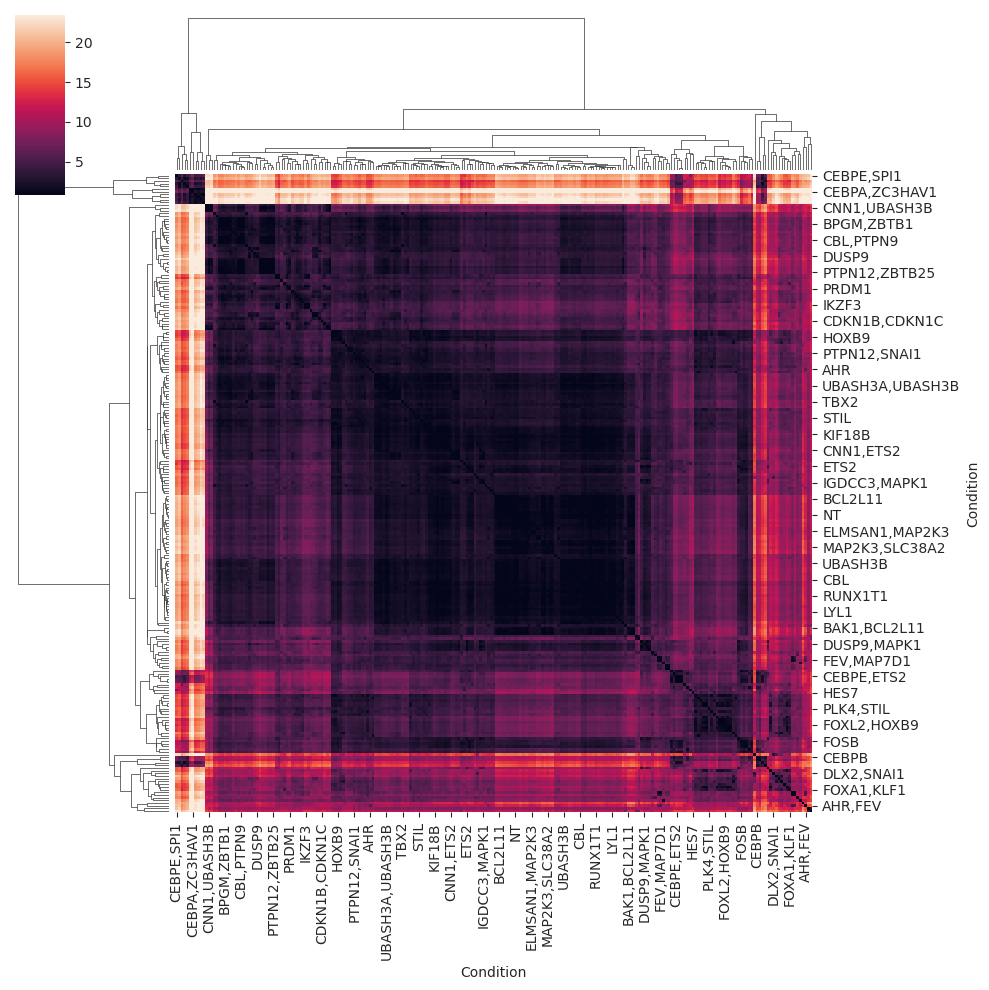

Output()

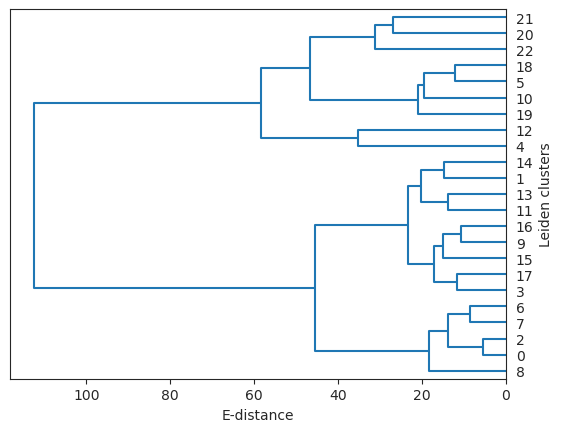

<Figure size 640x480 with 0 Axes>

In [23]:
figs_distance = cr.ax.compute_distance(col_perturbation, col_cell_type=col_cell_type, 
                                       distance_type="edistance", method="X_pca",
                                       kwargs_plot=None, highlight_real_range=False, plot=True)

## SCCoda

### Compositional Analysis

In [ ]:
reference_cell_type = 1
sccoda_out = cr.ax.analyze_composition(
    adata, reference_cell_type, analysis_type="cell_level",
    generate_sample_level=True, col_cell_type=col_cell_type,
    col_sample_id=col_sample_id, modality_key=None,
    col=col_perturbation, est_fdr=0.05, plot=True,
    out_file=None)